# Распространение тепла

### Условие задачи

**Дано:**
- твердое тело, в массе которого распространяется тепло от нескольких источников
- тело - куб $[0, L] x [0, L] x [0, L]$ с коэффициентом диффузии $D = 4.0$ (правка: $D = 1.0$)
- в центре куба расположен шар радиуса $R = L/5$ с низким коэффициентом диффузии $D_R = 10^{-12}$ (правка: $D_R = 10^{-16}$)
- $T_0 = 0$ - начальная температура во всем объеме куба
- граничные условия на гранях куба двух видов:
    - фиксированная температура на гранях
        - $x = 0$
        - $y = L$
    - абсолютная теплоизоляция на гранях
        - $x = L$
        - $y = 0$ 
        - $z = 0$
        - $z = L$ 
- в массе куба расположены источники тепла, мощность которых меняется по периодическому закону $\dot{q}_i = p_i \cdot (sin(\frac{2\pi}{\theta_i}t + \phi_i) + 1)$

    - пластина 0:
        - центр $(0.2L, 0.5L, 0.5L)$
        - размеры (от центра до края) $(4/dx, 0.2L, 0.2L)$
        - $p_0 = 100$, $\theta_0 = 50$, $\phi_0 = 0$
        
    - пластина 1:
        - центр $(0.5L, 0.2L, 0.5L)$
        - размеры (от центра до края) $(0.2L, 4/dx, 0.2L)$
        - $p_0 = 100$, $\theta_0 = 77$, $\phi_0 = 10$
    
- координаты проб, для которых необходимо построить графики изменения температуры от времени
    - проба 0: $(0.3L, 0.3L, 0.5L)$
    - проба 1: $(0.3L, 0.7L, 0.5L)$
    - проба 2: $(0.7L, 0.7L, 0.5L)$
    - проба 3: $(0.7L, 0.3L, 0.5L)$
    
- $dx$ - шаг пространственного разбиения по всем трем измерениям
- $t_m = 600$ c - общее время моделирования

![](heat_transfer_task.png)
<center>Рис. 1. Сечение тела плоскостью z=L/2</center>


**Требуется:**
- согласно уравнению диффузии смоделировать распространение тепла в кубе на заданное время $t_m$ при:
    - $L = 100$
    - $(dx, dt) \in [(4, 0.2), (2, 0.1), (1, 0.05), (0.5, 0.025)]$
    
    
- для каждой пары $(dx, dt)$:
    1. вывести время расчета
    
    2. сохранить в файл(ы) и использовать в пунктах 3-5:
        - температурное поле в конечный момент времени
        - замеры температуры в местах установки проб

    3. построить цветовую карту в конечный момент времени в сечении $z = 0.5L$
        - подписать оси,
        - отобразить цветовую шкалу (colorbar),
        - отобразить пробы в виде точек и подписать их номера.

    4. на одном рисунке построить графики температур в местах установки проб
        - подписать оси,
        - вывести легенду.

    5. используя быстрое преобразование Фурье, восстановить периоды колебаний температуры в местах установки проб
        - `np.fft.rfft`, `np.fft.rfftfreq`, `scipy.signal.find_peaks`
    

**Описание:**

Распространение тепла можно описать при помощи уравнения диффузии (уравнение с частными производными):

$\frac{\partial{T}}{\partial{t}} = D \left(\frac{\partial^2{T}}{\partial{x^2}} + \frac{\partial^2{T}}{\partial{y^2}} + \frac{\partial^2{T}}{\partial{z^2}} \right) + \dot{q}$, где

- $T(t, x, y, z)$ - поле температур
- $D(x, y, z)$ - коэффициент диффузии
- $\dot q(t, x, y, z)$ - функция источников тепла

Для решения нестационарной задачи распространения тепла рассматриваемое тело представляют в виде сетки с равномерным шагом, а дифференциальное уравнение заменяют на конечно-разностное. Рассмотрим схему `FTCS`, т.е. производная по времени заменяется на правую разность (Forward Time), а вторая производная по пространственным переменным заменяется на центральную разность (Central Space).

$\frac{\partial{T}}{\partial{t}} \rightarrow \frac{T^{n}_{i,j,k} - T^{n-1}_{i,j,k}}{dt}$

$\frac{\partial^2{T}}{\partial{x^2}} \rightarrow \frac{T^{n-1}_{i-1,j,k} - 2T^{n-1}_{i,j,k} + T^{n-1}_{i+1,j,k}}{dx^2}, ...$


$\frac{T^{n}_{i,j} - T^{n-1}_{i,j}}{dt} = \frac{D_{i,j}}{dx^2} \left(T^{n-1}_{i-1,j,k} + T^{n-1}_{i+1,j,k} + T^{n-1}_{i,j-1,k}  + T^{n-1}_{i,j+1,k} + T^{n-1}_{i,j,k-1} + T^{n-1}_{i,j,k+1} - 6T^{n-1}_{i,j,k}\right) + \dot{q}$

Итоговая рекуррентная формула для вычисления температуры в момент времени $n \cdot dt$ в ячейке сетки $(i, j, k)$ на основании данных в момент времени $(n-1) \cdot dt$:

$T^{n}_{i,j} = T^{n-1}_{i,j} + \frac{dt D_{i,j,k}}{dx^2} \left(T^{n-1}_{i-1,j,k} + T^{n-1}_{i+1,j,k} + T^{n-1}_{i,j-1,k}  + T^{n-1}_{i,j+1,k} + T^{n-1}_{i,j,k-1} + T^{n-1}_{i,j,k+1} - 6T^{n-1}_{i,j,k}\right) + dt \cdot \dot{q}^{n}_{i,j,k}$

Временной шаг $dt$ должен быть таким, чтобы учитывать условие Курранта: $dt = \frac{C \cdot dx}{D}$, где $C$ - число Курранта.

В этой задаче рассматриваются граничные условия двух видов - фиксированная температура и абсолютная теплоизоляция. Оба вида граничных условий указаны на гранях куба. Таким образом, расчет распространения тепла выполняется для всех ячеек сетки, за исключением расположенных на гранях куба, т.е. $i, j, k \in (0, N-1)$, где $N = L / dx$.
Граничное условие в виде фиксированной температуры записывается в соответствующие граням куба ячейки сетки. 

Например, для грани $x = 0$: $T^{n}_{0,j,k} = T_*$, грани $x = L$: $T^{n}_{N-1,j,k} = T_*$. 


Граничное условие в виде абсолютной теплоизоляции означает, что через заданную грань нет потока тепла, а это достижимо, если температура в ячейках грани и прилегающим к ним ячейкам одинаковая. 

Например, $x = 0$: $T^{n}_{0,j,k} = T^{n}_{1,j,k}$, грани $x = L$: $T^{n}_{N-1,j,k} = T^{n}_{N-2,j,k}$.


**Материалы:**

- [Уравнение теплопроводности](https://ru.wikipedia.org/wiki/Уравнение_теплопроводности)
- [Solving 2D heat equation numerically using python](https://levelup.gitconnected.com/solving-2d-heat-equation-numerically-using-python-3334004aa01a)
- [Diffusion Eq 2D with Source](https://www.youtube.com/watch?v=aCRYfvh_bnY)


**Правила оценивания:**

- оценка за корректно выполненный расчет для пространственного шага $dx$, баллов из 100:
```
    dx    =   4,  2,  1, 0.5
    g(dx) =  10, 20, 30,  40
```
    
- штрафы $p(i)$, баллов:
    - не выведено время расчета - 20
    - не выполнено сохранение результатов в файл(ы) - 20
    - построение графиков не использует сохраненные результаты - 20
    - не построены графики температур в местах установки проб - 20
    - не построена карта - 20
    - не посчитаны периоды колебаний - 20
    - менее значимые недоработки - 10
    
    
- бонусы $b(j)$, баллов:
    - выполнить задания для $(dx, dt) = (0.25, 0.01)$ - 20


- итоговая оценка за задание = $\sum_{n=1}^{4}{g(L)} - \sum_{i}{p(i)} + \sum_{j}{b(j)}$


# Решение

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import holoviews as hv


ModuleNotFoundError: No module named 'seaborn'

In [ ]:
from tqdm import trange, tqdm
from copy import deepcopy
from numba import njit, prange
from time import time
from scipy.signal import find_peaks

### Константы

In [ ]:
D = 1    
Dr = 1e-16    
T0 = 0
t_m = 600
L = 100   

In [ ]:
plate_0 = {
    'center' : np.array([0.2 * L, 0.5 * L, 0.5 * L], dtype=float),   
    'size' : np.array([4, 0.2 * L, 0.2 * L], dtype=float),    
    'p' : 100,  
    'tetta' : 50,
    'fi' : 0
}

plate_1 = {
    'center' : np.array([0.5 * L, 0.2 * L, 0.5 * L], dtype=float), 
    'size' : np.array([0.2 * L, 4, 0.2 * L], dtype=float), 
    'p' : 100, 
    'tetta' : 77,
    'fi' : 10,
}

probe = [np.array([0.3 * L, 0.3 * L, 0.5 * L], dtype=float),
         np.array([0.3 * L, 0.7 * L, 0.5 * L], dtype=float),
         np.array([0.7 * L, 0.7 * L, 0.5 * L], dtype=float),
         np.array([0.7 * L, 0.3 * L, 0.5 * L], dtype=float)]



### Функции для расчётов

In [ ]:
@njit(parallel = True)
def diffuse_step_numpy(it : int, T : np.ndarray, D : np.ndarray, dt : float, dx : float, L : int = 100) -> None:
    '''
    '''
    t_i = it % 2  
    t_j = (it + 1) % 2    
    n = int(L / dx)
    for i in prange(1, n - 1):
        for j in range(1, n - 1):
            for k in prange(1, n - 1):
                coef = dt * D[i, j, k] / dx**2
                T[t_j, i, j, k] = T[t_i, i, j, k] + \
                                  coef * (T[t_i, i + 1,     j,     k] + 
                                          T[t_i, i - 1,     j,     k] + 
                                          T[t_i,     i, j + 1,     k] + 
                                          T[t_i,     i, j - 1,     k] +
                                          T[t_i,     i,     j, k + 1] +
                                          T[t_i,     i,     j, k - 1] - 
                                      6 * T[t_i,     i,     j,     k])


def isolation(T : np.ndarray) -> None:
    '''
    '''
    # x = L
    T[:, -1,  :,  :] = T[:, -2,  :,  :]
    # y = 0
    T[:,  :,  0,  :] = T[:,  :,  1,  :]
    # z = 0
    T[:,  :,  :,  0] = T[:,  :,  :,  1]
    # z = L
    T[:,  :,  :, -1] = T[:,  :,  :, -2]


def source(it : int, T : np.ndarray, sources : list, dt : float) -> None:
    '''
    '''
    cur = it % 2
    for s in sources:
        x1 = int(s['center'][0] - s['size'][0])
        x2 = int(s['center'][0] + s['size'][0])
        y1 = int(s['center'][1] - s['size'][1])
        y2 = int(s['center'][1] + s['size'][1])
        z1 = int(s['center'][2] - s['size'][2])
        z2 = int(s['center'][2] + s['size'][2])

        p = s['p']
        tetta = s['tetta']
        fi = s['fi']
        t = it * dt
        T[cur, x1:x2, y1:y2, z1:z2] += p * (np.sin((2 * np.pi / tetta) * t + fi) + 1) * dt


@njit(parallel=True)
def generate(L : int, dx : float, dt : float, D : float, Dr : float) -> tuple:
    nx = int(L / dx)

    Dxyz = np.full((nx, nx, nx), D, dtype=np.float64)
    R = int(L / 5)
    for i in prange(int(0.3 * L / dx), int(0.7 * L / dx)):
        for j in range(int(0.3 * L / dx), int(0.7 * L / dx)):
            for k in range(int(0.3 * L / dx), int(0.7 * L / dx)):
                if (
                   ((i + 1/2) * dx - L / 2)**2 +
                   ((j + 1/2) * dx - L / 2)**2 +
                   ((k + 1/2) * dx - L / 2)**2
                ) <= R**2:
                    Dxyz[i, j, k] = Dr
    
    T = np.full((2, nx, nx, nx), T0, dtype=np.float64)

    return T, Dxyz


### Отрисовка в процессе моделирования

In [ ]:
%env DOC_HV_HTML = true

env: DOC_HV_HTML=true


In [ ]:
pipe = hv.streams.Pipe()

def heatmap(data):
    return hv.Image(T[0, :, :, int(L / (2 * dx))], bounds=(0, 0, L, L)).opts(width=500, 
                                                                             height=400, 
                                                                             colorbar=True,
                                                                             cmap='magma')

hv.extension('bokeh')
hv.DynamicMap(heatmap, streams = [pipe])

### Расчёты

In [ ]:
params = [(4, 0.2), (2, 0.1), (1, 0.05), (0.5, 0.025), (0.25,0.01)]
dx_dt = [(1, 0.05)]

for i, params_pair in enumerate(params):
    dx, dt = params_pair    
    start = time()      

    T, Dxyz = generate(L, dx, dt, D, Dr)

    plate0_cur = deepcopy(plate0)
    plate1_cur = deepcopy(plate1)
    plate0_cur['center'] /= dx
    plate1_cur['center'] /= dx
    plate0_cur['size'] /= dx
    plate1_cur['size'] /= dx

    probe_cur = deepcopy(probe)
    for j in range(4):
        probe_cur[j] /= dx

    probe_states = [[], [], [], []]

    iterations = int(t_m / dt)

    for it in trange(iterations):
        source(it, T, [plate0_cur, plate1_cur], dt)
        diffuse_step_numpy(it, T, Dxyz, dt, dx)
        isolation(T)
        cur = it % 2
        for j, location in enumerate(probe_cur):
            probe_states[j].append(T[cur, int(location[0]), int(location[1]), int(location[2])])

        if it % (iterations // 20) == 0:
            pipe.send(0)
    
    probe_states = np.array(probe_states)

    t = time() - start
    print(f'\n    Для значений (dx, dt) = ({dx}, {dt}), время = {t:.4f} сек')

    np.savez(directory, T=T[1], probe_1=probe_states[0], probe_2=probe_states[1], probe_3=probe_states[2], probe_4=probe_states[3]) 
    
    pipe.send(0)

100%|██████████| 3000/3000 [00:01<00:00, 1734.36it/s]



    Для значений (dx, dt) = (4, 0.2), время = 1.7409 сек


100%|██████████| 6000/6000 [00:04<00:00, 1497.82it/s]



    Для значений (dx, dt) = (2, 0.1), время = 4.0279 сек


100%|██████████| 12000/12000 [00:32<00:00, 363.99it/s]



    Для значений (dx, dt) = (1, 0.05), время = 33.0049 сек


100%|██████████| 24000/24000 [11:04<00:00, 36.12it/s]



    Для значений (dx, dt) = (0.5, 0.025), время = 665.6874 сек


100%|██████████| 60000/60000 [3:36:02<00:00,  4.63it/s]



    Для значений (dx, dt) = (0.25, 0.01), время = 12963.4270 сек


### Иллюстрация результатов

In [ ]:
def show_title(i : int, dx : float, dt: float) -> None:
    plt.figure(figsize=(17, 2.5))
    plt.plot([1, 11, 11, 1, 1], [3, 3, 1, 1, 3])
    plt.text(1.15, 1.745, 'Эксперимент №' + str(i + 1) + '(dx, dt)=(' + str(dx) + ',' + str(dt) + ')', size=50)
    plt.yticks([])
    plt.xticks([])


def show_slice(dx : float, dt: float, probe : np.ndarray, L : int = 100) -> None:
    
    plt.figure(figsize=(10,8))
    sns.heatmap(np.flipud(results['T'][:, :, int(L / (2 * dx))].T))
    probe_cur = deepcopy(probe)
    for j in range(4):
        probe_cur[j] /= dx

    probe_num = {2 : 1, 1 : 2, 4 : 3, 3 : 4}

    for i, p in enumerate(probe_cur):
        plt.scatter(p[0], p[1], color='c')
        plt.text(p[0] + 1, p[1] - 1, 'Проба ' + str(probe_num[i + 1]), color='w')
    
    plt.title('Цветовая карта для (dx, dt)=(' + str(dx) + ',' + str(dt) + ')')
    plt.xlabel('Ось x куба')
    plt.ylabel('Ось y куба')
    plt.show()


def show_probes(dx : float, dt: float, t_m : int = 600, L : int = 100) -> None:
    """
    Функция для отрисовки температур в местах проб
    """
    
    plt.figure(figsize=(10,8))
    for i in range(4):
        key = 'probe_' + str(i + 1)
        times = np.arange(0, 600, dt)
        sns.lineplot(x=times, y=results[key], label='Проба ' + str(i + 1))
    plt.xlabel('Время (в секундах)')
    plt.ylabel('Температура')
    plt.title('Графики колебания температур в местах установки проб для (dx, dt)=(' + str(dx) + ',' + str(dt) + ')')
    plt.show()


def count_periods(dx : float, dt: float) -> None:
    """
    Функция для вычисления и вывода периодов колебания температур в местах установки проб
    """

    print('Параметры = (' + str(dx) + ',' + str(dt) + ')')
    print('Результаты:')
    for i in range(4):
        probe_result = results['probe_' + str(i + 1)]
        N = probe_result.size
        amp = np.abs(np.fft.rfft(probe_result - probe_result.mean())) / (N / 2)
        freq = np.fft.rfftfreq(N, dt)
        pos, _ = find_peaks(amp)
        print('    Проба ' + str(i + 1))
        print('        Амплитуды: ' + str(amp[pos]))
        print('        Периоды:   ' + str(1 / freq[pos]))
        plt.plot(freq[:50], amp[:50], label='Проба ' + str(i))
    plt.show()

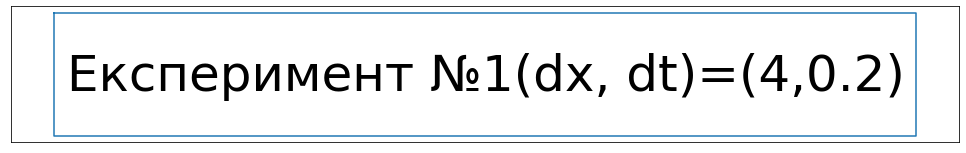

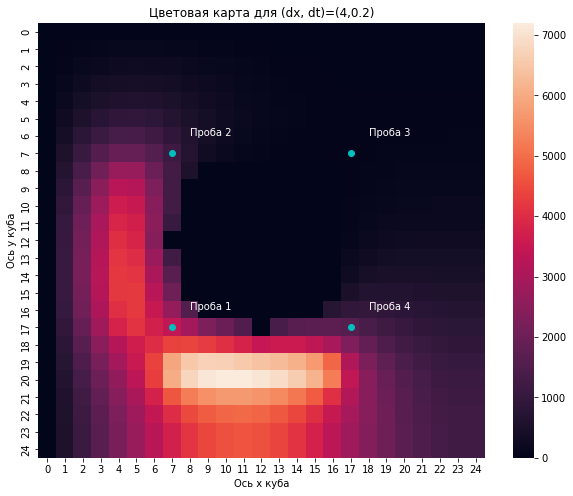

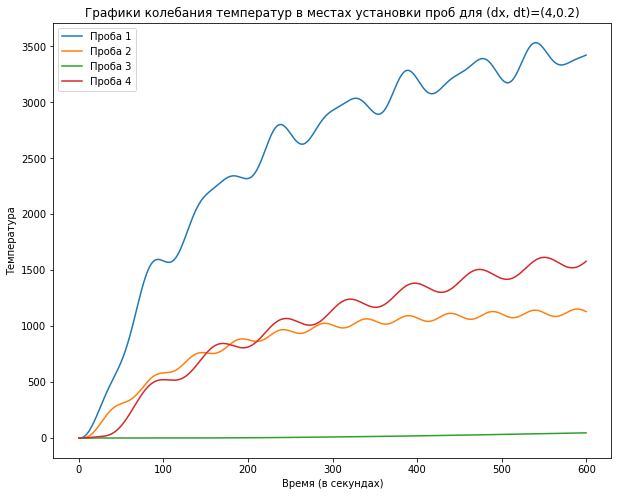

Параметры = (4,0.2)
Результаты:
    Проба 1
        Амплитуды: [947.08217931 113.36752465 143.20705002]
        Периоды:   [600.          66.66666667  50.        ]
    Проба 2
        Амплитуды: [300.72034806  60.8894427 ]
        Периоды:   [600.  50.]
    Проба 3
        Амплитуды: [16.57129998]
        Периоды:   [600.]
    Проба 4
        Амплитуды: [491.2268118   49.84533397]
        Периоды:   [600.          66.66666667]


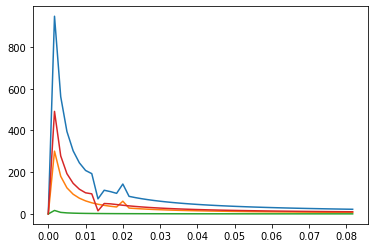

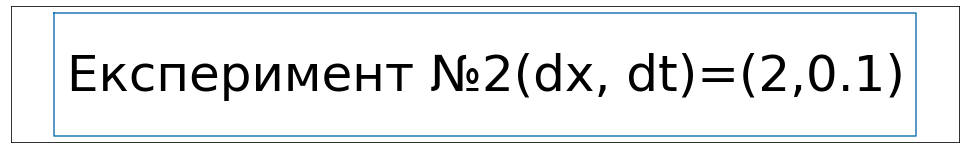

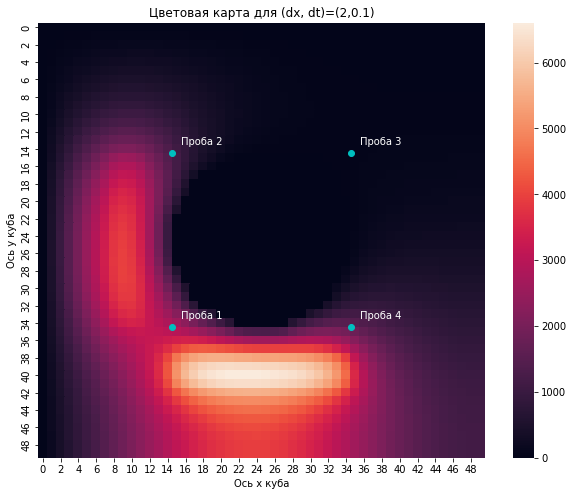

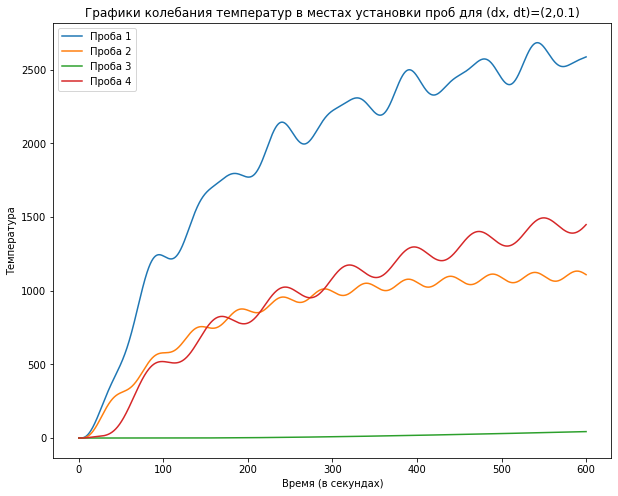

Параметры = (2,0.1)
Результаты:
    Проба 1
        Амплитуды: [714.8781023   84.94586894 111.06150047]
        Периоды:   [600.          66.66666667  50.        ]
    Проба 2
        Амплитуды: [293.50194846  61.65331316]
        Периоды:   [600.  50.]
    Проба 3
        Амплитуды: [15.73733517]
        Периоды:   [600.]
    Проба 4
        Амплитуды: [441.76716287  45.0719768 ]
        Периоды:   [600.          66.66666667]


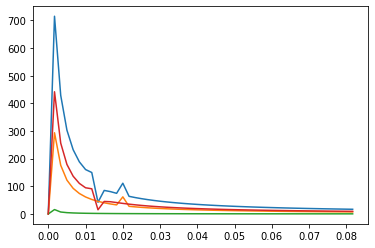

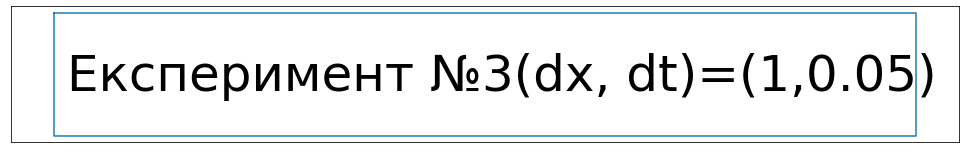

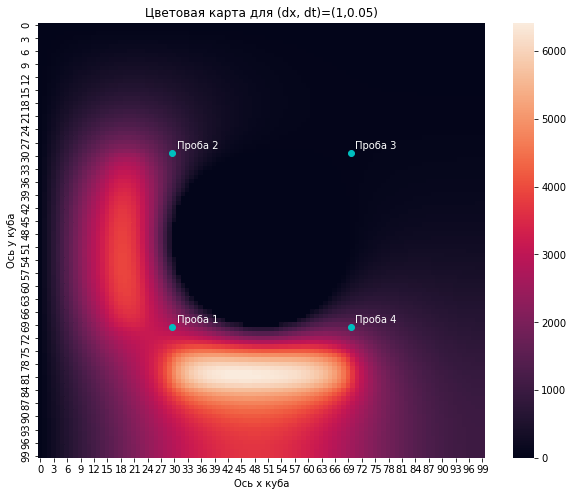

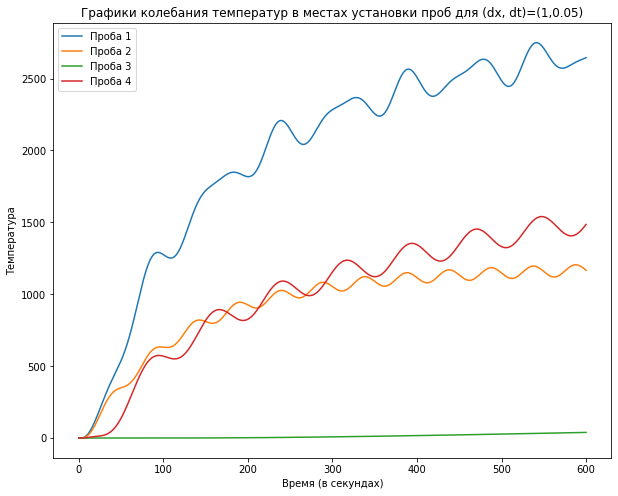

Параметры = (1,0.05)
Результаты:
    Проба 1
        Амплитуды: [722.36829305  86.73455738 116.71058489]
        Периоды:   [600.          66.66666667  50.        ]
    Проба 2
        Амплитуды: [299.84923856  71.76495193]
        Периоды:   [600.  50.]
    Проба 3
        Амплитуды: [14.2072743]
        Периоды:   [600.]
    Проба 4
        Амплитуды: [438.74493842  45.55183517]
        Периоды:   [600.          66.66666667]


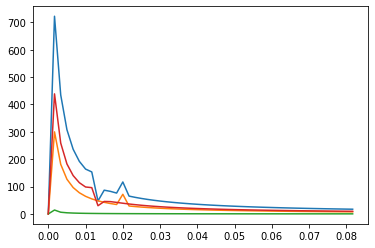

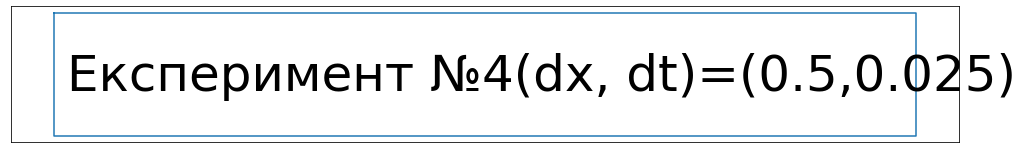

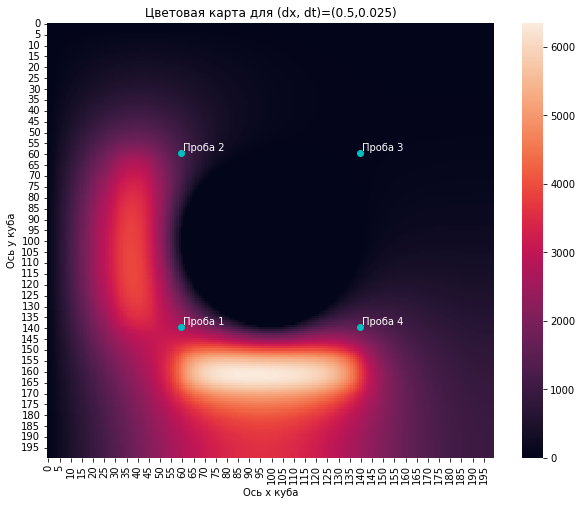

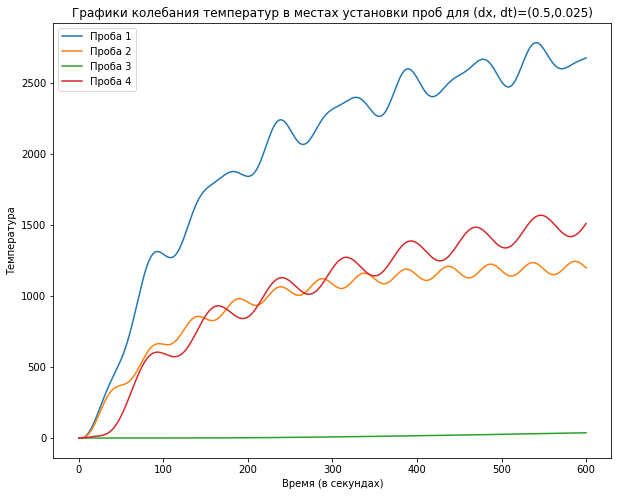

Параметры = (0.5,0.025)
Результаты:
    Проба 1
        Амплитуды: [726.64707799  87.68642728 118.92531038]
        Периоды:   [600.          66.66666667  50.        ]
    Проба 2
        Амплитуды: [303.29014291  77.0012842 ]
        Периоды:   [600.  50.]
    Проба 3
        Амплитуды: [13.42822502]
        Периоды:   [600.]
    Проба 4
        Амплитуды: [438.28410077  46.03246102]
        Периоды:   [600.          66.66666667]


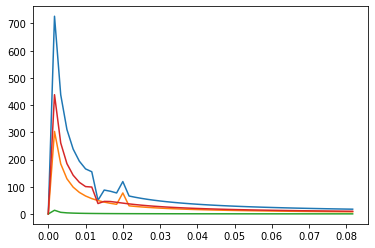

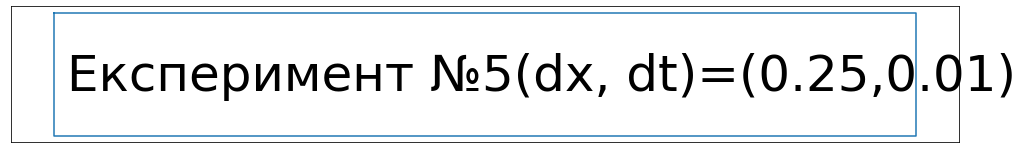

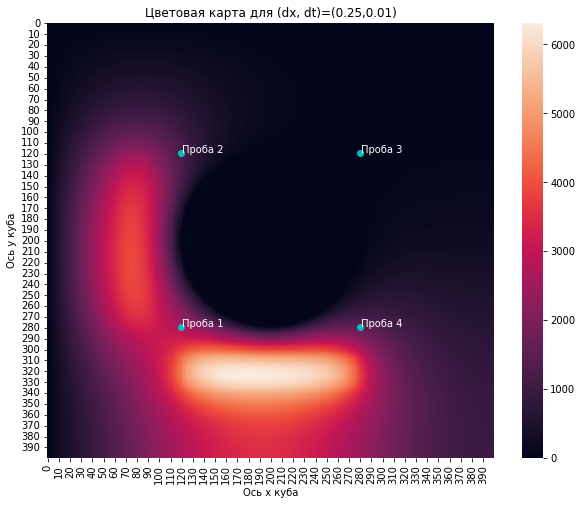

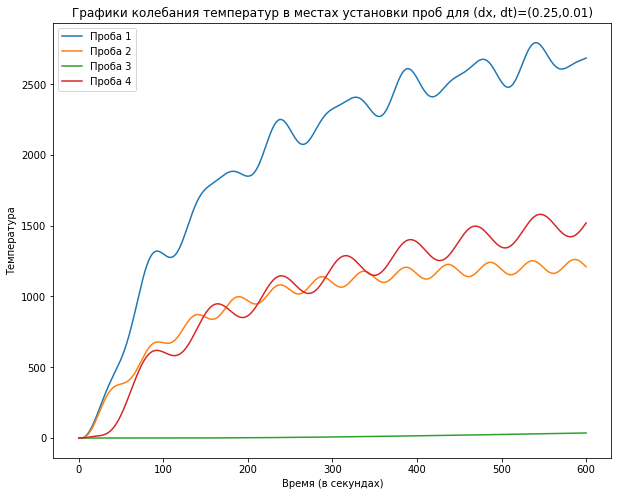

Параметры = (0.25,0.01)
Результаты:
    Проба 1
        Амплитуды: [727.81267988  88.04650898 119.78728825]
        Периоды:   [600.          66.66666667  50.        ]
    Проба 2
        Амплитуды: [304.66198986  79.62197387]
        Периоды:   [600.  50.]
    Проба 3
        Амплитуды: [13.01826495]
        Периоды:   [600.]
    Проба 4
        Амплитуды: [437.7528456   46.28175758]
        Периоды:   [600.          66.66666667]


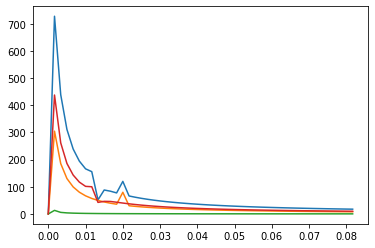

In [ ]:
for i, params_pair in enumerate(params):
    dx, dt = params_pair    # 
    show_title(i, dx, dt)
    show_slice(dx, dt, probe, L)
    show_probes(dx, dt, t_m, L)
    count_periods(dx, dt)